In [ ]:
#https://portal.brain-map.org/atlases-and-data/rnaseq/human-m1-10x

In [1]:
import os

import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

0.8.0


# Load labeled AnnData

Processed data can be generated by notebook below:

[1_construct_sn_rna_hm1_10x](1_construct_sn_rna_hm1_10x.ipynb)

In [65]:
data_path =r'L:\Shiwei\DNA_MERFISH_analysis\hM1_10x'

adata = sc.read(os.path.join(data_path, r'hM1_10X_labeled.h5ad'))

In [66]:
adata

AnnData object with n_obs × n_vars = 74892 × 3911
    obs: 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_call', 'outlier_type', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_g

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


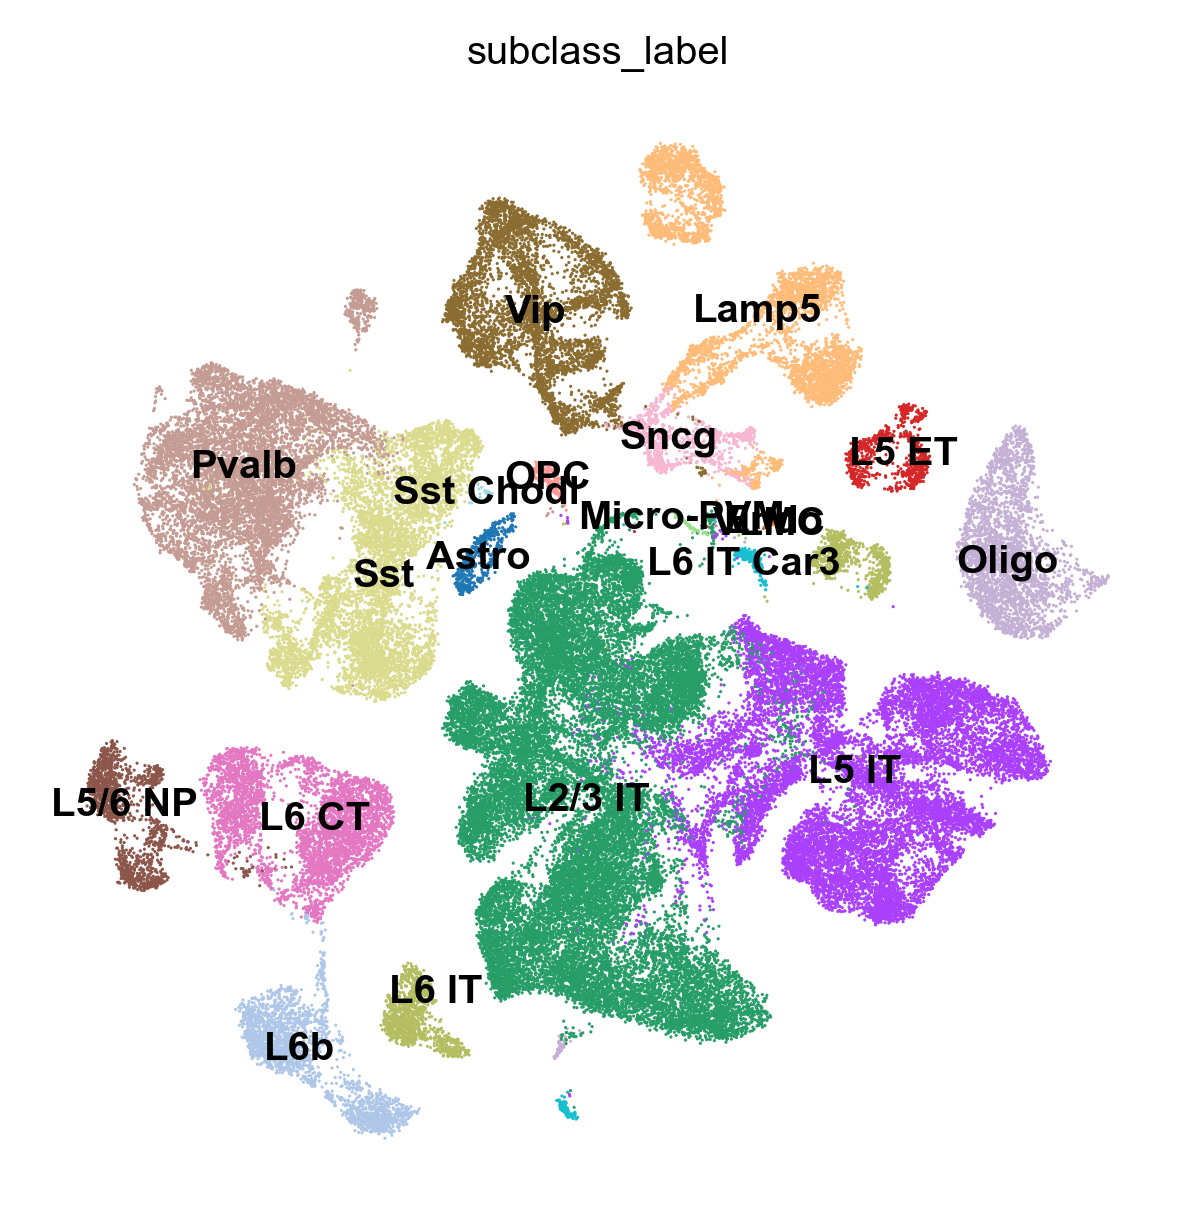

In [5]:
sc.pl.umap(adata, color='subclass_label', legend_loc='on data')

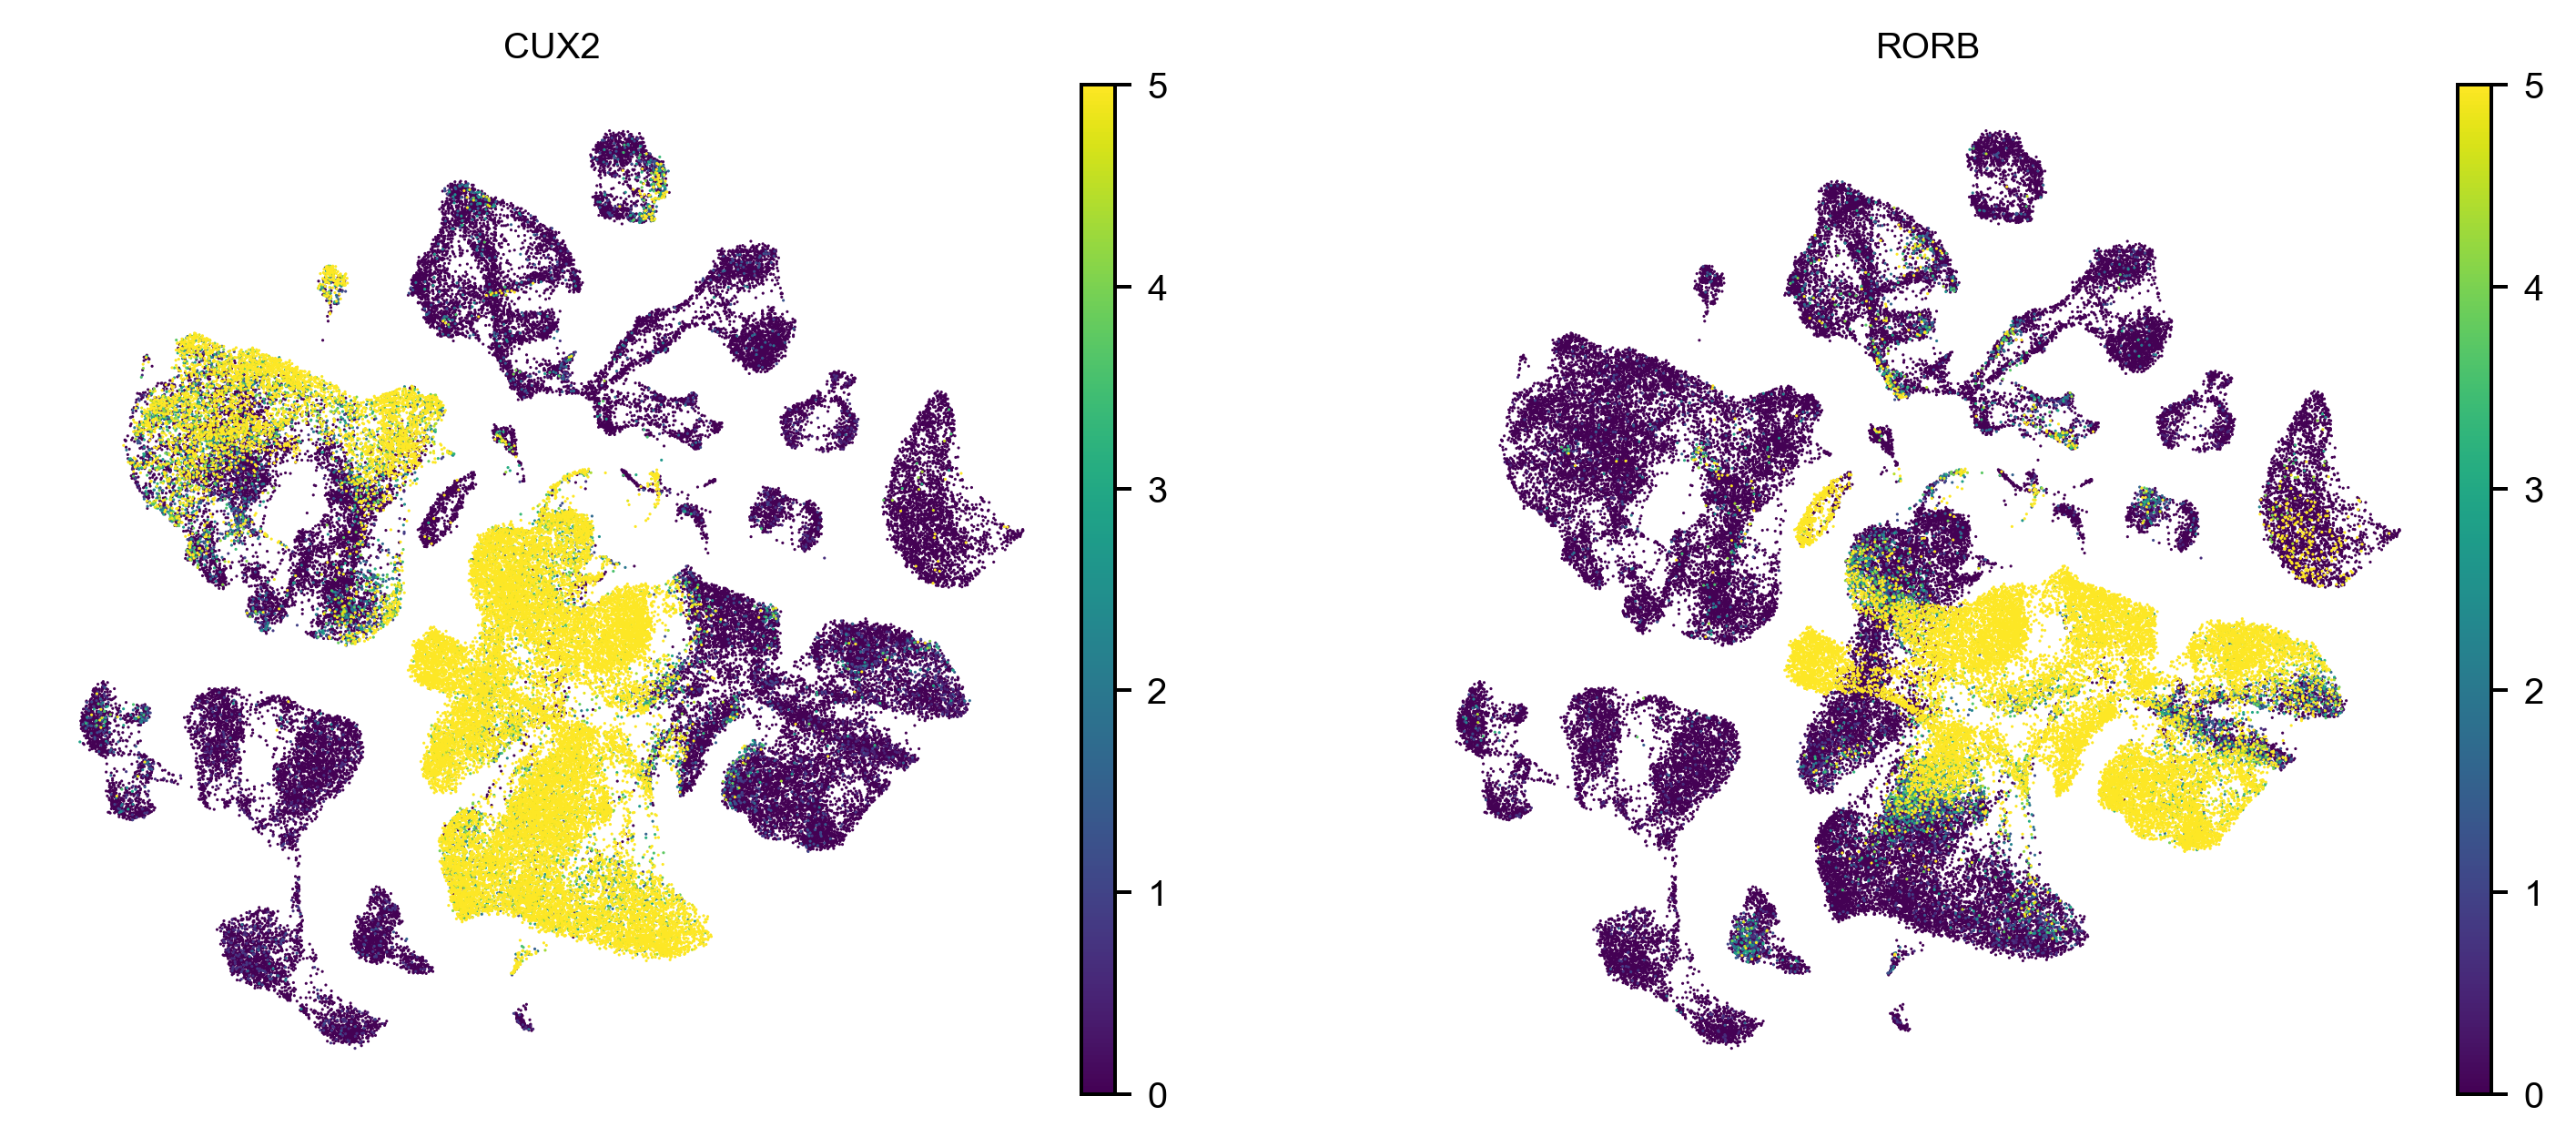

In [30]:
sc.pl.umap(adata, color=['CUX2','RORB'],vmax=5,legend_loc='on data')

# Rename the class labels etc

In [68]:
adata.obs['subclass_label_new'] = adata.obs['subclass_label'] 

In [69]:
np.unique(adata.obs['subclass_label_new'])

array(['Astro', 'Endo', 'L2/3 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Micro-PVM', 'OPC', 'Oligo',
       'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip'], dtype=object)

## 1. Rename micro-pvm

In [70]:
adata.obs = adata.obs.replace({'subclass_label_new':{'Micro-PVM':'Micro'}})

In [71]:
np.unique(adata.obs['subclass_label_new'])

array(['Astro', 'Endo', 'L2/3 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo',
       'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip'], dtype=object)

## 2. Rename L4-like cells

In [72]:
# L4-like clusters according to the original paper
'Exc L3-5 RORB LINC01202'
'Exc L3 RORB OTOGL'

L4_clusters = ['Exc L3-5 RORB LINC01202','Exc L3 RORB OTOGL']

In [79]:
np.unique(adata.obs['subclass_label_new'].values)

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Micro', 'OPC',
       'Oligo', 'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip'],
      dtype=object)

In [75]:
L4_obs_df = adata.obs[adata.obs['cluster_label'].isin(L4_clusters)]
other_obs_df = adata.obs[~adata.obs['cluster_label'].isin(L4_clusters)]

L4_obs_df.loc[:,'subclass_label_new'] = pd.Categorical(['L4/5 IT']*len(L4_obs_df))
new_obs_df = pd.concat([L4_obs_df, other_obs_df]).loc[adata.obs.index]
adata.obs = new_obs_df

adata.obs

C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_14980\207123119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L4_obs_df.loc[:,'subclass_label_new'] = pd.Categorical(['L4/5 IT']*len(L4_obs_df))
C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_14980\207123119.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  L4_obs_df.loc[:,'subclass_label_new'] = pd.Categorical(['L4/5 IT']*len(L4_obs_df))


exp_component_name  \
sample_name                                                                   
AAACCCAAGGATTTCC-LKTX_190129_01_A01  AAACCCAAGGATTTCC-21L8TX_180927_001_A01   
AAACCCAAGTATGGCG-LKTX_190129_01_A01  AAACCCAAGTATGGCG-21L8TX_180927_001_A01   
AAACCCACAAAGTGTA-LKTX_190129_01_A01  AAACCCACAAAGTGTA-21L8TX_180927_001_A01   
AAACCCACACTACTTT-LKTX_190129_01_A01  AAACCCACACTACTTT-21L8TX_180927_001_A01   
AAACCCACAGTGAGCA-LKTX_190129_01_A01  AAACCCACAGTGAGCA-21L8TX_180927_001_A01   
...                                                                     ...   
TTTGTTGAGATGGCGT-LKTX_190130_01_H01  TTTGTTGAGATGGCGT-35L8TX_181108_001_D01   
TTTGTTGCACAGCCAC-LKTX_190130_01_H01  TTTGTTGCACAGCCAC-35L8TX_181108_001_D01   
TTTGTTGCAGAGACTG-LKTX_190130_01_H01  TTTGTTGCAGAGACTG-35L8TX_181108_001_D01   
TTTGTTGCATAATGAG-LKTX_190130_01_H01  TTTGTTGCATAATGAG-35L8TX_181108_001_D01   
TTTGTTGTCTACTCAT-LKTX_190130_01_H01  TTTGTTGTCTACTCAT-35L8TX_181108_001_D01   

                                                cluster_label cluster_color  \
sample_name                                                                   
AAACCCAAGGATTTCC-LKTX_190129_01_A01        Inh L1-2 SST CCNJL       #fb8d00   
AAACCCAAGTATGGCG-LKTX_190129_01_A01   Exc L5-6 FEZF2 IFNG-AS1       #2c815f   
AAACCCACAAAGTGTA-LKTX_190129_01_A01   Exc L3-5 RORB LINC01202       #547d7a   
AAACCCACACTACTTT-LKTX_190129_01_A01    Exc L2 LINC00507 GLRA3       #cecd32   
AAACCCACAGTGAGCA-LKTX_190129_01_A01  Oligo L2-6 OPALIN FTH1P3       #003a28   
...                                                       ...           ...   
TTTGTTGAGATGGCGT-LKTX_190130_01_H01  Oligo L2-6 OPALIN FTH1P3       #003a28   
TTTGTTGCACAGCCAC-LKTX_190130_01_H01        Exc L3-5 RORB LNX2       #01d9d5   
TTTGTTGCAGAGACTG-LKTX_190130_01_H01       Exc L2-3 RORB PTPN3       #b7ce00   
TTTGTTGCATAATGAG-LKTX_190130_01_H01  Oligo L2-6 OPALIN FTH1P3       #003a28   
TTTGTTGTCTACTCAT-LKTX_190130_01_H01     Inh L2-5 PVALB RPH3AL       #d7003c   

                                     cluster_order    class_label class_color  \
sample_name                                                                     
AAACCCAAGGATTTCC-LKTX_190129_01_A01             50      GABAergic     #FF7373   
AAACCCAAGTATGGCG-LKTX_190129_01_A01            116  Glutamatergic     #3DCC3D   
AAACCCACAAAGTGTA-LKTX_190129_01_A01             87  Glutamatergic     #3DCC3D   
AAACCCACACTACTTT-LKTX_190129_01_A01             75  Glutamatergic     #3DCC3D   
AAACCCACAGTGAGCA-LKTX_190129_01_A01            120   Non-Neuronal     #171799   
...                                            ...            ...         ...   
TTTGTTGAGATGGCGT-LKTX_190130_01_H01            120   Non-Neuronal     #171799   
TTTGTTGCACAGCCAC-LKTX_190130_01_H01             90  Glutamatergic     #3DCC3D   
TTTGTTGCAGAGACTG-LKTX_190130_01_H01             81  Glutamatergic     #3DCC3D   
TTTGTTGCATAATGAG-LKTX_190130_01_H01            120   Non-Neuronal     #171799   
TTTGTTGTCTACTCAT-LKTX_190130_01_H01             64      GABAergic     #FF7373   

                                     class_order subclass_label  \
sample_name                                                       
AAACCCAAGGATTTCC-LKTX_190129_01_A01            1            Sst   
AAACCCAAGTATGGCG-LKTX_190129_01_A01            2        L5/6 NP   
AAACCCACAAAGTGTA-LKTX_190129_01_A01            2          L5 IT   
AAACCCACACTACTTT-LKTX_190129_01_A01            2        L2/3 IT   
AAACCCACAGTGAGCA-LKTX_190129_01_A01            3          Oligo   
...                                          ...            ...   
TTTGTTGAGATGGCGT-LKTX_190130_01_H01            3          Oligo   
TTTGTTGCACAGCCAC-LKTX_190130_01_H01            2          L5 IT   
TTTGTTGCAGAGACTG-LKTX_190130_01_H01            2        L2/3 IT   
TTTGTTGCATAATGAG-LKTX_190130_01_H01            3          Oligo   
TTTGTTGTCTACTCAT-LKTX_190130_01_H01            1          Pvalb   

                                    subclass_color  subclass_order  ...  \


C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


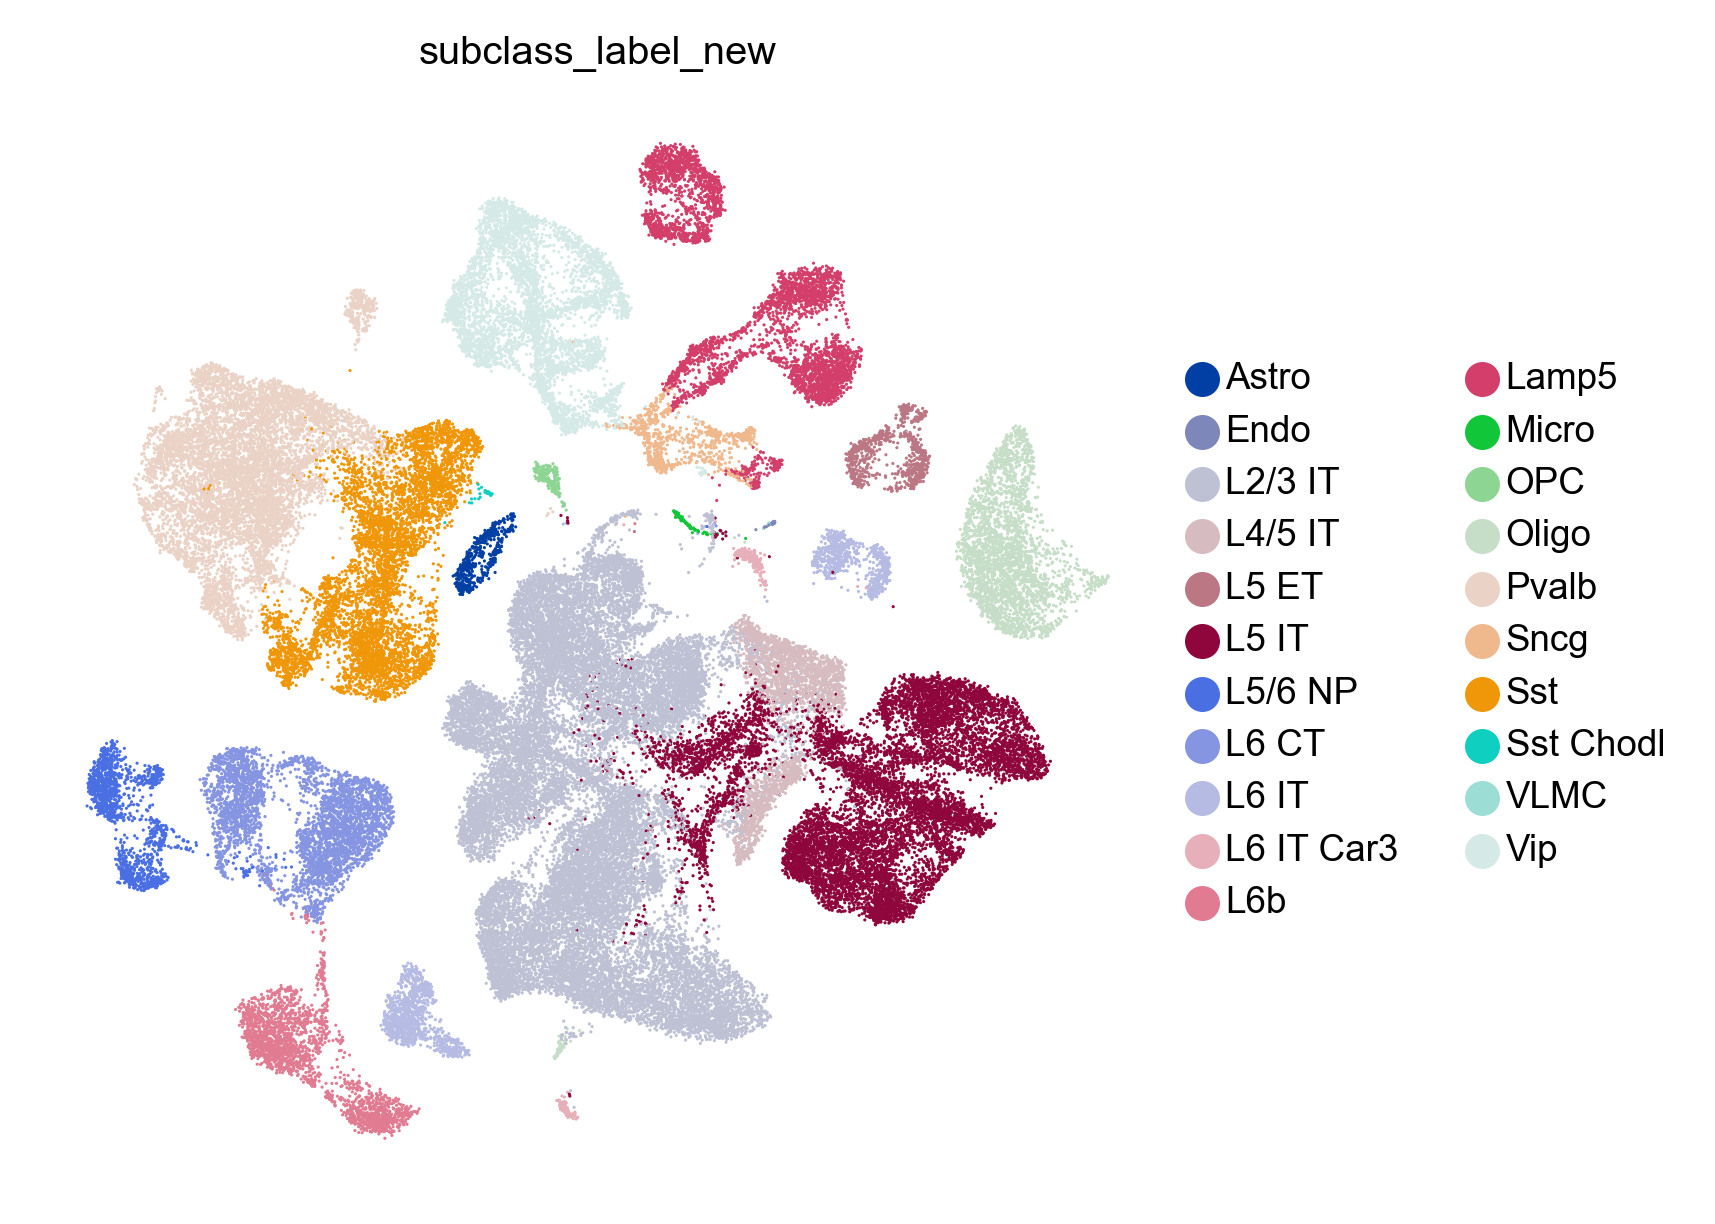

In [77]:
sc.pl.umap(adata, color='subclass_label_new', #legend_loc='on data'
          )

## 3. Rename class label

In [80]:
np.unique(adata.obs['subclass_label_new'].values)

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Micro', 'OPC',
       'Oligo', 'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip'],
      dtype=object)

In [78]:
# duplicate the column for manual labeling of the final classes
adata.obs['class_label_new'] = adata.obs['subclass_label_new'] 

In [81]:
new_class_dict = {}

for _class in ['L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP','L6 CT', 'L6 IT', 'L6b','L6 IT Car3']:
    new_class_dict[_class]='Gluta'
    
for _class in ['Lamp5','Pvalb', 'Sncg', 'Sst', 'Vip', 'Sst Chodl']:
    new_class_dict[_class]='GABA'
    
for _class in ['OPC','Oligo']:
    new_class_dict[_class]='Oligo'
    
for _class in ['Astro']:
    new_class_dict[_class]='Astro'
    
for _class in ['Micro']:
    new_class_dict[_class]='Micro'
    
for _class in ['Endo']:
    new_class_dict[_class]='Endo'

new_class_dict   

{'L2/3 IT': 'Gluta',
 'L4/5 IT': 'Gluta',
 'L5 ET': 'Gluta',
 'L5 IT': 'Gluta',
 'L5/6 NP': 'Gluta',
 'L6 CT': 'Gluta',
 'L6 IT': 'Gluta',
 'L6b': 'Gluta',
 'L6 IT Car3': 'Gluta',
 'Lamp5': 'GABA',
 'Pvalb': 'GABA',
 'Sncg': 'GABA',
 'Sst': 'GABA',
 'Vip': 'GABA',
 'Sst Chodl': 'GABA',
 'OPC': 'Oligo',
 'Oligo': 'Oligo',
 'Astro': 'Astro',
 'Micro': 'Micro',
 'Endo': 'Endo'}

In [82]:
# re-label subclass based on Cux2 and Rorb expression level

new_class_label_dict ={'class_label_new':new_class_dict}

adata.obs = adata.obs.replace(new_class_label_dict)

In [83]:
np.unique(adata.obs['class_label_new'])

array(['Astro', 'Endo', 'GABA', 'Gluta', 'Micro', 'Oligo', 'VLMC'],
      dtype=object)

## 4. Rename neuron identity

In [84]:
# duplicate the column for manual labeling of the final classes
adata.obs['neuron_identity'] = adata.obs['class_label'] 

In [85]:
# re-label subclass based on Cux2 and Rorb expression level

new_class_dict = {}

new_class_dict['Glutamatergic']='Neuronal'
new_class_dict['GABAergic']='Neuronal'
new_class_dict['Non-Neuronal']='Non-Neuronal'

new_class_label_dict ={'neuron_identity':new_class_dict}

adata.obs = adata.obs.replace(new_class_label_dict)

np.unique(adata.obs['neuron_identity'])

array(['Neuronal', 'Non-Neuronal'], dtype=object)

# Save

In [86]:
data_path =r'L:\Shiwei\DNA_MERFISH_analysis\hM1_10x'


adata.write(os.path.join(data_path, r'hM1_10X_labeled_newname.h5ad'))